In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-data-set/loan_train.csv
/kaggle/input/loan-data-set/loan_test.csv


#READING THE DATA

In [2]:
train=pd.read_csv("/kaggle/input/loan-data-set/loan_train.csv")

In [3]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [4]:
train.tail()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,458300,0.0,13300000,360.0,0.0,Semiurban,N


In [5]:
train.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
580,Male,Yes,2,Graduate,No,654000,0.0,20500000,360.0,1.0,Semiurban,Y
347,Male,Yes,2,Not Graduate,No,308300,216800.0,12600000,360.0,1.0,Urban,Y
419,Male,Yes,0,Graduate,No,324600,141700.0,13800000,360.0,1.0,Semiurban,Y
579,Male,No,0,Graduate,NaN,318200,291700.0,16100000,360.0,1.0,Urban,Y
257,Male,Yes,3+,Graduate,No,525000,0.0,9400000,360.0,1.0,Urban,N


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [7]:
train.isnull()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
train.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

In [9]:
train.isnull().sum().sum()

127

0#FILLING NULL VALUES

In [10]:
train1=train.fillna(value=0)

In [11]:
train1

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y


In [12]:
train1.isnull().sum().sum()

0

In [13]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              614 non-null    object 
 1   Married             614 non-null    object 
 2   Dependents          614 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       614 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                614 non-null    float64
 9   Credit_History      614 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [14]:
train1.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,614.000000,614.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,334.201954,0.773616
std,6.109042e+05,2.926248e+05,8.815682e+06,82.183884,0.418832
min,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.000000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.000000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.000000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.000000,1.000000


#DATA WRANGLING/DATA CLEANING

In [15]:
for col in train1.columns:
    print(col)

Gender
Married
Dependents
Education
Self_Employed
Applicant_Income
Coapplicant_Income
Loan_Amount
Term
Credit_History
Area
Status


In [16]:
for col in train1.columns:
    print(col)
    print("================================")
    print(train1[col].value_counts())

Gender
Male      489
Female    112
0          13
Name: Gender, dtype: int64
Married
Yes    398
No     213
0        3
Name: Married, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
0      15
Name: Dependents, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Self_Employed
No     500
Yes     82
0       32
Name: Self_Employed, dtype: int64
Applicant_Income
250000    9
458300    6
600000    6
260000    6
333300    5
         ..
324400    1
440800    1
391700    1
399200    1
758300    1
Name: Applicant_Income, Length: 505, dtype: int64
Coapplicant_Income
0.0         273
250000.0      5
208300.0      5
166600.0      5
225000.0      3
           ... 
279100.0      1
101000.0      1
169500.0      1
259800.0      1
24000.0       1
Name: Coapplicant_Income, Length: 287, dtype: int64
Loan_Amount
0           21
12000000    20
11000000    17
10000000    15
16000000    12
            ..
19100000     1
3500000      1
28000000     1
4200000  

#EDA 

In [17]:
train1.shape

(614, 12)

# Univariant analysis

<AxesSubplot:>

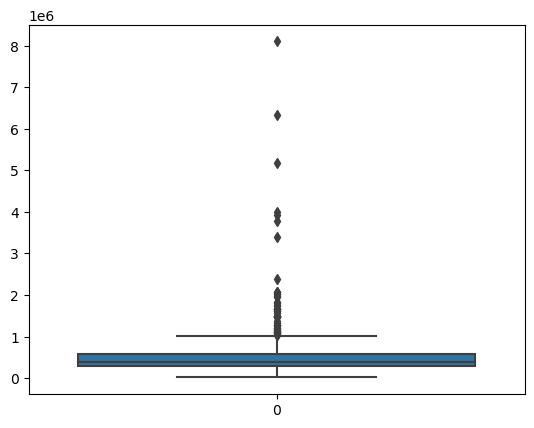

In [18]:
sns.boxplot(train1['Applicant_Income'])

<AxesSubplot:xlabel='Term', ylabel='Count'>

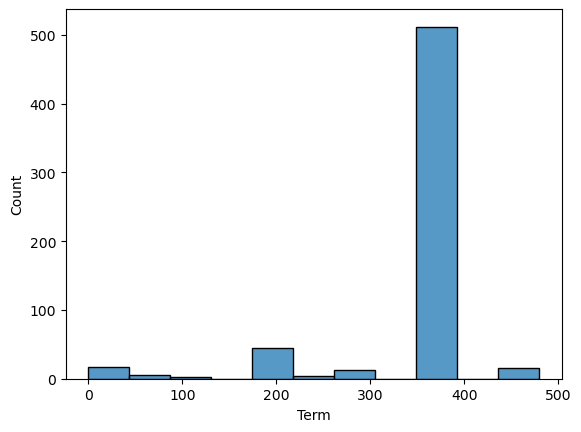

In [19]:
sns.histplot(train1['Term'])

<AxesSubplot:xlabel='Loan_Amount', ylabel='Count'>

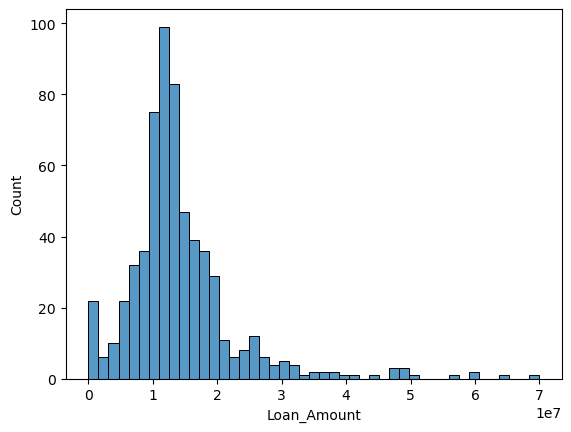

In [20]:

sns.histplot(train1['Loan_Amount'])

<AxesSubplot:xlabel='Loan_Amount', ylabel='Density'>

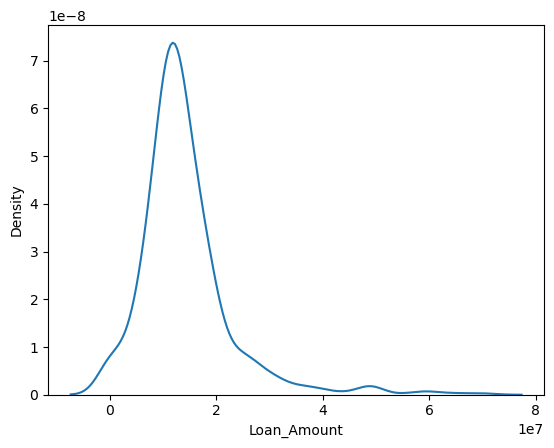

In [21]:
sns.kdeplot(train1['Loan_Amount'])

# VISUALIZATION

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

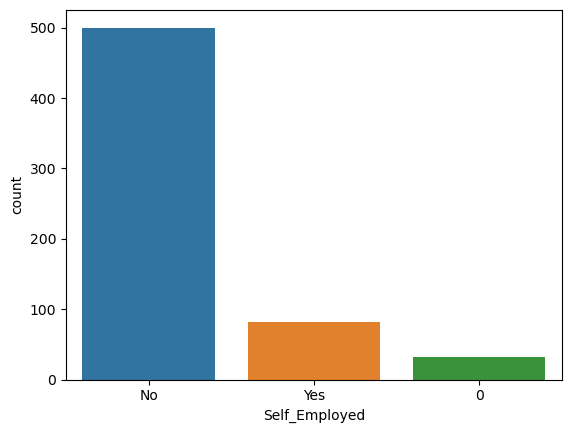

In [22]:
sns.countplot(x='Self_Employed',data=train1)

<AxesSubplot:xlabel='Gender', ylabel='count'>

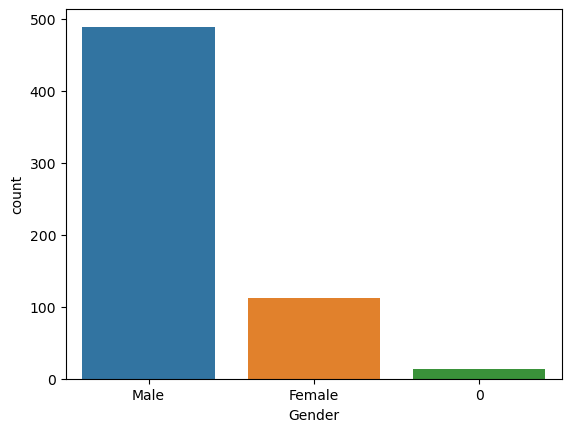

In [23]:
sns.countplot(x='Gender',data=train1)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

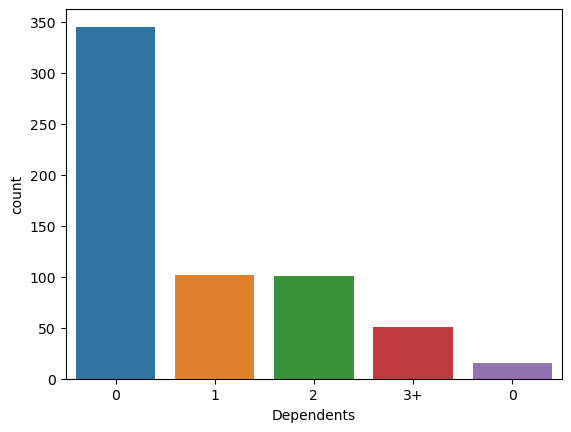

In [24]:
sns.countplot(x='Dependents',data=train1)

<AxesSubplot:xlabel='Education', ylabel='count'>

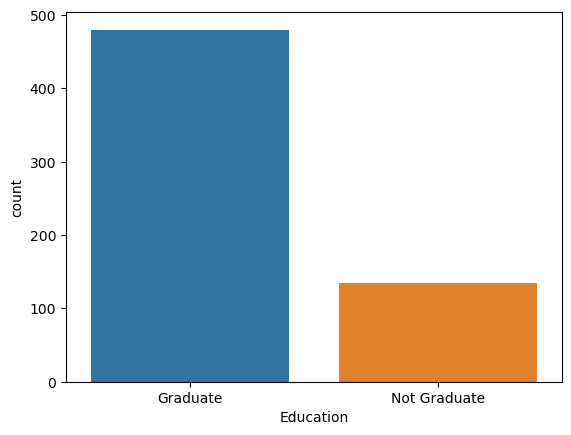

In [25]:
sns.countplot(x='Education',data=train1)

<AxesSubplot:>

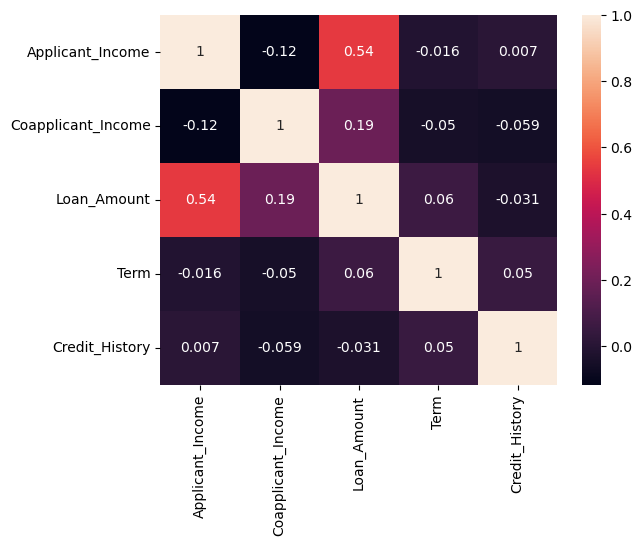

In [26]:
corr = train1.corr()
sns.heatmap(corr, annot = True)


#MACHINE LEARNING USING SKLEARN(LINEAR REGRESSION)


In [27]:
from sklearn.preprocessing import OneHotEncoder
def category_to_column(df, column, prefix=''):
    df_copy = df.copy()
    oe_style = OneHotEncoder()
    oe_results = oe_style.fit_transform(df_copy[[column]])
    name_columns = prefix + oe_style.categories_[0]
    temp = pd.DataFrame(oe_results.toarray(), columns=name_columns, index=df_copy.index)
    df_copy = pd.concat([df_copy, temp], axis=1)
    return df_copy

In [28]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()

In [29]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
train1.head()


,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [32]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              614 non-null    object 
 1   Married             614 non-null    object 
 2   Dependents          614 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       614 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                614 non-null    float64
 9   Credit_History      614 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [33]:
train1.columns
train1 = train1.dropna()
X = train1[[ 'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount',
       'Term', 'Credit_History']] .values 
print(X[0:5])


y = train1['Status'].values

print(y[0:5])

[[5.849e+05 0.000e+00 1.500e+07 3.600e+02 1.000e+00]
 [4.583e+05 1.508e+05 1.280e+07 3.600e+02 1.000e+00]
 [3.000e+05 0.000e+00 6.600e+06 3.600e+02 1.000e+00]
 [2.583e+05 2.358e+05 1.200e+07 3.600e+02 1.000e+00]
 [6.000e+05 0.000e+00 1.410e+07 3.600e+02 1.000e+00]]
['Y' 'N' 'Y' 'Y' 'Y']


In [34]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

k = 4
ng = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
ng

KNeighborsClassifier(n_neighbors=4)

In [36]:
yhat = ng.predict(X_test)
yhat[0:5]

array(['Y', 'Y', 'N', 'Y', 'Y'], dtype=object)

In [37]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, ng.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8105906313645621
Test set Accuracy:  0.6910569105691057


** PLZ UPVOTE IF IT'S HELPFULL** 